# Práctica: Preprocesamiento de datos

Eres un asistente de investigación en una consulta de investigación de mercado. Se te ha asignado analizar los datos de una encuesta sobre la percepción de una compañía tecnológica. Esta cuenta con 9 variables cuantitativas (X1 a X9) relacionadas a la percepción del desempeño de la compañía.

In [203]:
!pip install pyreadstat

In [204]:
import pandas as pd
import numpy as np

np.random.seed(25)
# random=np.random.default_rng(25)

df = pd.read_spss('HATCO.sav') 
df.drop(columns=['Caso','X8','X10','X11','X12','X13','X14'],inplace=True)
for col in df:
    ori_rat = df[col].isna().mean()
    if ori_rat >= 0.2: continue
    add_miss_rat = (0.2 - ori_rat) / (1 - ori_rat)
    vals_to_nan = df[col].dropna().sample(frac=add_miss_rat).index
    df.loc[vals_to_nan, col] = np.NaN
df

,X1,X2,X3,X4,X5,X6,X7,X9
0,NaN,6.0,69.0,NaN,24.0,23.0,52.0,320.0
1,18.0,30.0,63.0,66.0,NaN,40.0,84.0,430.0
2,34.0,52.0,57.0,NaN,43.0,27.0,82.0,NaN
3,27.0,10.0,71.0,59.0,18.0,23.0,78.0,320.0
4,60.0,9.0,NaN,78.0,34.0,NaN,45.0,580.0
...,...,...,...,...,...,...,...,...
95,NaN,NaN,NaN,50.0,7.0,21.0,84.0,250.0
96,61.0,5.0,NaN,48.0,33.0,28.0,NaN,NaN
97,20.0,28.0,52.0,NaN,24.0,27.0,84.0,380.0
98,NaN,22.0,67.0,68.0,26.0,29.0,NaN,420.0


## Parte 1: Manejo de datos faltantes

Visualiza los casos perdidos de todas las variables a la vez
>Sugerencia: Utiliza la función `matrix` disponible en el paquete `missingno`.

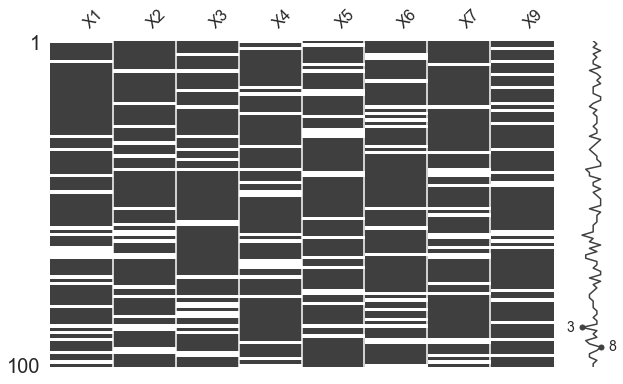

In [205]:
import missingno as msno
msno.matrix(df, figsize=(10, 6));

Explora si existen co-ocurrencias de valores perdidos entre las variables disponibles. ¿Qué puedes concluir? 
>Sugerencia: Utiliza la función `heatmap` disponible en el paquete `missingno`.

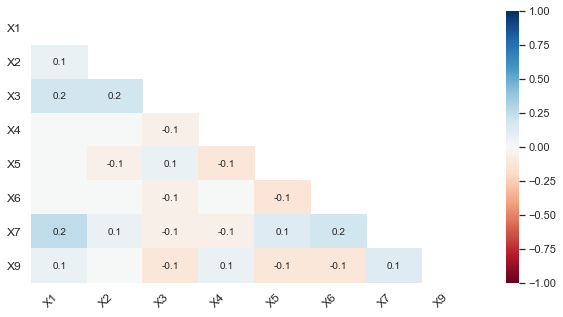

In [206]:
msno.heatmap(df, figsize=(10,5), fontsize=12);

Los valores faltantes no co-ocurren en las diferentes variables con demasiada frecuencia. Esto indica que puede que se trate de un proceso MCAR. 

Imputa los datos reemplazando los valores faltantes con el promedio de la variable a la que están asociados. 

In [207]:
df_mean_impute = df.transform(lambda x: x.fillna(x.mean()))
df_mean_impute

,X1,X2,X3,X4,X5,X6,X7,X9
0,35.2125,6.0,69.000,52.275,24.00,23.0000,52.0,320.00
1,18.0000,30.0,63.000,66.000,29.15,40.0000,84.0,430.00
2,34.0000,52.0,57.000,52.275,43.00,27.0000,82.0,459.75
3,27.0000,10.0,71.000,59.000,18.00,23.0000,78.0,320.00
4,60.0000,9.0,79.475,78.000,34.00,27.0875,45.0,580.00
...,...,...,...,...,...,...,...,...
95,35.2125,23.2,79.475,50.000,7.00,21.0000,84.0,250.00
96,61.0000,5.0,79.475,48.000,33.00,28.0000,69.6,459.75
97,20.0000,28.0,52.000,52.275,24.00,27.0000,84.0,380.00
98,35.2125,22.0,67.000,68.000,26.00,29.0000,69.6,420.00


Ahora imputa los datos con el método MICE.

In [208]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
imp = IterativeImputer(estimator=lr,missing_values=np.nan, max_iter=100, verbose=2, imputation_order='roman',random_state=0)
X=imp.fit_transform(df)

[IterativeImputer] Completing matrix with shape (100, 8)
[IterativeImputer] Ending imputation round 1/100, elapsed time 0.01
[IterativeImputer] Change: 122.52787533738106, scaled tolerance: 0.65 
[IterativeImputer] Ending imputation round 2/100, elapsed time 0.02
[IterativeImputer] Change: 34.13645321963419, scaled tolerance: 0.65 
[IterativeImputer] Ending imputation round 3/100, elapsed time 0.03
[IterativeImputer] Change: 43.11170908129043, scaled tolerance: 0.65 
[IterativeImputer] Ending imputation round 4/100, elapsed time 0.04
[IterativeImputer] Change: 64.7194460901236, scaled tolerance: 0.65 
[IterativeImputer] Ending imputation round 5/100, elapsed time 0.05
[IterativeImputer] Change: 68.15725458011218, scaled tolerance: 0.65 
[IterativeImputer] Ending imputation round 6/100, elapsed time 0.06
[IterativeImputer] Change: 41.41933903445042, scaled tolerance: 0.65 
[IterativeImputer] Ending imputation round 7/100, elapsed time 0.07
[IterativeImputer] Change: 18.731428312478243, 

In [209]:
df_mice_imput = pd.DataFrame(X,columns=df.columns.values.tolist())
df_mice_imput

,X1,X2,X3,X4,X5,X6,X7,X9
0,45.043444,6.000000,69.000000,48.872620,24.00000,23.000000,52.000000,320.000000
1,18.000000,30.000000,63.000000,66.000000,24.34591,40.000000,84.000000,430.000000
2,34.000000,52.000000,57.000000,55.030421,43.00000,27.000000,82.000000,486.726708
3,27.000000,10.000000,71.000000,59.000000,18.00000,23.000000,78.000000,320.000000
4,60.000000,9.000000,96.834996,78.000000,34.00000,40.750559,45.000000,580.000000
...,...,...,...,...,...,...,...,...
95,2.355985,12.727614,67.526125,50.000000,7.00000,21.000000,84.000000,250.000000
96,61.000000,5.000000,102.178965,48.000000,33.00000,28.000000,51.229344,573.219318
97,20.000000,28.000000,52.000000,56.143220,24.00000,27.000000,84.000000,380.000000
98,29.640376,22.000000,67.000000,68.000000,26.00000,29.000000,70.446897,420.000000


## Parte 2: Detección de valores extremos

Explora si existen outliers en cada una de las variables del dataset `df_mice_imput`. Para ello, considera como potenciales valores extremos a aquellos casos que presenten valores fuera del rango de 2.5 desviaciones estándares alrededor de la media. Reporta los índices de los casos potenciales que hayas identificado.  

In [210]:
# Los datos con los que trabajamos
data = df_mice_imput 

# Visualizamos los outliers  
u = 2.5 # desviaciones estándar
v = "X1" # nombre de la variable
data[np.abs(data[v]-data[v].mean())>(u*data[v].std())]

,X1,X2,X3,X4,X5,X6,X7,X9
38,0.000000,21.000000,69.000000,54.0,11.0,26.0,89.0,290.0
95,2.355985,12.727614,67.526125,50.0,7.0,21.0,84.0,250.0


Los índices de los potenciales valores extremos detectados con este método univariado son 21,6,41,95,81,2,70,38.

Emplea la distancia de Mahalanobis para identificar potenciales valores extremos. Reporta los índices de los casos potenciales que hayas identificado.  

In [211]:
from sklearn.covariance import MinCovDet

# Los datos con los que trabajamos
data = df_mice_imput 

# Calculamos la distancia de Mahalanobis
robust_cov = MinCovDet().fit(data)
D2 = robust_cov.mahalanobis(data)

# Calculamos la métrica D^2/df
D2_df = D2/data.shape[1]
print(D2_df)

[ 1.242345    1.37421695  2.0873766   2.50516766  4.78436496  0.74240289
  1.26426973  1.06314845  8.95659897  0.58411591  1.07892658  0.94608199
  0.73312684 40.82659681  0.48547291  1.12096196  1.91719885 15.98574475
  1.07855277  2.8455854   0.75316674 62.44583876  2.83717021  0.56680216
  1.83264218  0.7336051   0.81046598  0.97840761  1.42206106  0.31755437
  0.67183426  1.74149352  0.80170659  0.46333076  1.40346578  0.5698997
  4.06231541  0.99444819  4.22125779  0.76680707  0.42756557  1.54136872
  3.13446208  1.19342882  3.71996114  6.43189273  3.43438146  1.60211256
  3.350152    1.88990361  5.65899159  0.90642117  2.78923282  1.18071027
  1.58769095  0.59225536  1.73752947  0.84099738  0.68861456  0.23071235
  1.05810293  0.5837763   3.31816499  0.92223018  2.07430625  0.23529171
  0.70261648 17.82735276  8.15983835  0.76053032  2.42789906  4.67826339
  1.20581118  1.57699474  0.97510836  1.31564682  0.82790502  1.08874715
  1.18985522  0.92524577  0.87877163  3.42499017  1.

In [212]:
print(np.where(D2_df>4))

(array([ 4,  8, 13, 17, 21, 36, 38, 45, 50, 67, 68, 71, 93, 99]),)


Comparando ambos métodos, ¿encuentras casos que hayan sido identificados con ambos métodos? De ser así, repórtalos y comenta si estos deben ser eliminados o no.

Los casos en los que coinciden ambos métodos son aquellos de índice 21 y 38. Antes de tomar la decisión de eliminarlos, se requiere examinar ambos casos en el contexto de la investigación y evaluar si realmente no representan a la población de datos que busca medirse.